# Finding the Best markets to Advertise In

What are the two best markets to advertise in for a company that offers courses on programming.

[Existing Data](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) can be used as an initial low-cost analysis for this type of question. Not only does this [data](https://github.com/freeCodeCamp/2017-new-coder-survey) cover new programmers with interests in web development, but all types of coding.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

survey_data.shape

(18175, 136)

In [3]:
survey_data.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

## Populations of Interest

Given the company is offering courses on web development, mobile development, data science, or even gaming, it is important to find the population of new programmers most interested in those subjects. 

Finding this population, along with their location, the location with the greatest number of new coders, and how much money new coders are willing to spend on learning will be useful for this analysis.

### Representation

With these goals in mind, let's explore the data a bit more to determine if the sample (the dataset being used) is repersentative of the population we would like to analyze.

In [4]:
job_interest = survey_data['JobRoleInterest']
job_interest.value_counts(normalize=True)

Full-Stack Web Developer                                                                                                                                                                                                                                  0.117706
  Front-End Web Developer                                                                                                                                                                                                                                 0.064359
  Data Scientist                                                                                                                                                                                                                                          0.021739
Back-End Web Developer                                                                                                                                                                                                         

Examining the `JobRoleInterest` is a good proxy for what new programmers would like to learn as it is the type of job role they are most interesting in, and likely to learn about.

In general, most of the responses include some type of web development as a job interest either stand alone or in conjunction with another type of job role interest. Other responses do include things like mobile and game development, as well as data science. So far it looks like this data set is well representative.

Just to be sure, let's examine what each roles people are interested in and how many have mixed interests.

In [5]:
int_no_null = job_interest.dropna()
split_interests = int_no_null.str.split(',')

split_interests

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

In [6]:
n_interests = split_interests.apply(lambda x: len(x))
n_interests.value_counts(normalize=True).sort_index()

1     0.316505
2     0.108839
3     0.158896
4     0.152174
5     0.120423
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
11    0.001859
12    0.003003
13    0.000286
Name: JobRoleInterest, dtype: float64

From the above table, the majority of new coders (31.6%) have a single job role interest. A single digit percentage of users have 6 or more job role interests. Let's look at what percentage of these new programmers have job role interests in web or mobile development in particular.

In [7]:
web_mobile_interest = int_no_null.str.contains('Web Developer|Mobile Developer')
pct_interest = web_mobile_interest.value_counts(normalize=True) * 100
print(pct_interest)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


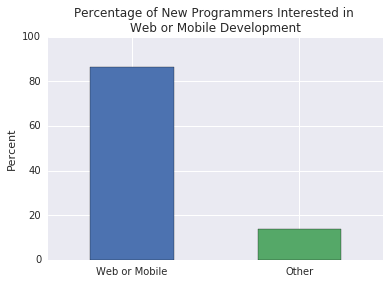

In [8]:
pct_interest.plot.bar()
plt.title('Percentage of New Programmers Interested in \nWeb or Mobile Development')
plt.ylim([0, 100])
plt.ylabel('Percent')
plt.xticks([0, 1], ['Web or Mobile', 'Other'], rotation=0)
plt.show()

From the initial analysis of our population, we can easily see that a large majority, about 86%, of the new programmers are interested in learning some form of web or mobile development.

This means the sample used represents the population well.

## Location and Density

With a well represented population, the next type of data of interest is where those new programmers are located and how many of them there are at each location.

Luckily, the data set being used includes a column which we can extract this data from, `CountryLive`. Unfortunately, this is the most granular data available with respect to location. However, each country can be thought of as having its own marke, so our goal for this section will be to find the best two countries to advertise in.

A good market indicator can be the number of potential customers a market contains. This will be the metric by which we decide the best countries to advertise in. 

In [9]:
loc_den = survey_data[ survey_data['JobRoleInterest'].notnull() ].copy()

abs_ld = loc_den['CountryLive'].value_counts()
rel_ld = loc_den['CountryLive'].value_counts(normalize=True)*100

pd.DataFrame({'Absolute Frequencies': abs_ld,
              'Relative Frequencies': rel_ld})

,Absolute Frequencies,Relative Frequencies
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


From this basic investigation, we can see the USA has the market with the largest percentage (and number) of potential customers by a large margin. India, United Kingdom, and Canada all have similar percentages of potential customers and following the USA as second, third, and fourth, respectively.

Although this data is providing a good basis for best countries to advertise in, there needs to be further investigation to see if these countries have potential customers that are also willing to spend money on programming and development education.


## Money Spending Customers

The `MoneyForLearning` column of our survey data describes the amount of money (in USD) spent by participants on learning programming and coding from the start of their journey until the point they responded to the survey. While this total amount is useful, most learning platforms are subscription based so a more intuitive metric will be finding the amount new users spend per month on their programming education.

This metric will give us an even better understanding of how well the adverts might perform in the given market. Another thing to consider, based on the previous analysis, is narrowing any further analysis to only the top countries. Namely, USA, India, UK, and Canada. The reason is two-fold -- they have the largest number of potential customers, and their official language is English (the same languages the courses are written in).

Let's have at it!



In [10]:
loc_den['MonthsProgramming'].value_counts()

# replace 0s to avoid division by 0 below
loc_den['MonthsProgramming'].replace(0, 1, inplace=True)

#calculate money spent per month, on average
loc_den['USD_month'] = loc_den['MoneyForLearning'] / loc_den['MonthsProgramming']


In [11]:
loc_den['USD_month'].value_counts(dropna=False)

 0.000000        3092
NaN               675
 50.000000        128
 25.000000        120
 16.666667        118
 100.000000       118
 33.333333        109
 8.333333         105
 20.000000         88
 10.000000         83
 83.333333         80
 166.666667        67
 12.500000         66
 4.166667          65
 5.000000          62
 200.000000        53
 500.000000        50
 66.666667         47
 41.666667         46
 250.000000        44
 1000.000000       43
 3.333333          38
 20.833333         37
 125.000000        36
 6.666667          35
 2.500000          33
 5.555556          31
 150.000000        31
 333.333333        31
 11.111111         31
                 ... 
 1.562500           1
 29.000000          1
 23.000000          1
 19.000000          1
 31.000000          1
 3.625000           1
 4.750000           1
 92.000000          1
 117.500000         1
 4.687500           1
 1142.857143        1
 0.900000           1
 866.666667         1
 1.344086           1
 1670.0000

Even after cleaning the data to avoid division by zero errors, there are still data points with null values. Let's get rid of data points with null values for both the `USD_month` and `CountryLive` columns, as follows:

In [12]:
survey_clean = loc_den[ loc_den['USD_month'].notnull() ]

survey_clean['USD_month'].value_counts(dropna=False)

0.000000        3092
50.000000        128
25.000000        120
16.666667        118
100.000000       118
33.333333        109
8.333333         105
20.000000         88
10.000000         83
83.333333         80
166.666667        67
12.500000         66
4.166667          65
5.000000          62
200.000000        53
500.000000        50
66.666667         47
41.666667         46
250.000000        44
1000.000000       43
3.333333          38
20.833333         37
125.000000        36
6.666667          35
2.500000          33
333.333333        31
5.555556          31
150.000000        31
11.111111         31
30.000000         28
                ... 
6.187500           1
121.428571         1
0.222222           1
1566.666667        1
2.714286           1
4.615385           1
2.692308           1
3500.000000        1
0.103448           1
1066.666667        1
71.000000          1
52.500000          1
137.500000         1
87.500000          1
1228.571429        1
40000.000000       1
56.333333    

In [13]:
survey_clean = survey_clean[ survey_clean['CountryLive'].notnull() ]

survey_clean['CountryLive'].value_counts(dropna=False)

United States of America         2933
India                             463
United Kingdom                    279
Canada                            240
Poland                            122
Germany                           114
Brazil                            111
Australia                         102
Russia                             79
Ukraine                            79
Nigeria                            72
Spain                              66
Romania                            65
France                             62
Netherlands (Holland, Europe)      59
Italy                              52
Serbia                             44
Philippines                        43
Ireland                            41
Greece                             40
South Africa                       36
Mexico                             33
Turkey                             31
Norway                             30
Argentina                          30
New Zealand                        30
Hungary     

Now with the data cleaned up a bit, we can look at the mean value for USD spent per month, sorted by country.

In [14]:
mean_countries = survey_clean.groupby('CountryLive').mean()

countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
mean_countries['USD_month'][countries]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: USD_month, dtype: float64

The results of this analysis don't look entirely off, but there is not enough information about these numbers relative to a persons average income (per country) to tell if a certain country has customers spending larger portions of their paycheck on learning programming or not.

## Outlying Data

Without knowing more information about income and relative spending, it is hard to tell what exactly is going on. However, we can check if there are any outliers within the data that may be skewing the mean spending amounts per month in one direction or another.

Let's plot the monthy spending for each of the top 4 countries.

In [15]:
top_4 = survey_clean[ survey_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada') ]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



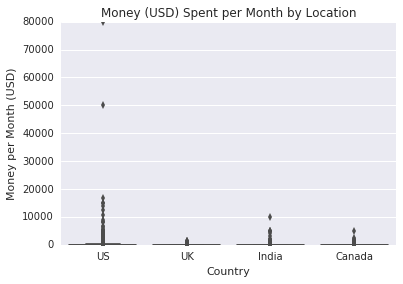

In [16]:
sns.boxplot(x='CountryLive', y='USD_month', data=top_4)
plt.title('Money (USD) Spent per Month by Location')
plt.xlabel('Country')
plt.ylabel('Money per Month (USD)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

It is immediately obvious there are outliers for the US, it does not seem likely anyone is spending 50,000 or even 80,000 USD per month to learn programming. It is quite a bit more difficult to tell what outliers exist for the UK, or Canada. There may be one or two outliers in India.

Let's recalculate the mean values after getting rid of monthy costs over 20,000 USD.

In [17]:
survey_clean = survey_clean[ survey_clean['USD_month'] < 20000 ]

In [18]:
mean_countries = survey_clean.groupby('CountryLive').mean()

countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
mean_countries['USD_month'][countries]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: USD_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



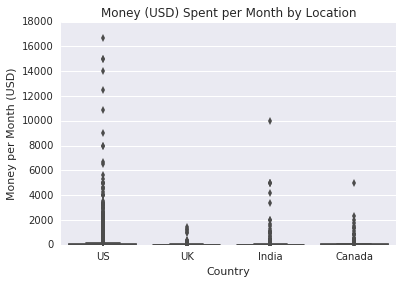

In [19]:
top_4 = survey_clean[ survey_clean['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada') ]

sns.boxplot(x='CountryLive', y='USD_month', data=top_4)
plt.title('Money (USD) Spent per Month by Location')
plt.xlabel('Country')
plt.ylabel('Money per Month (USD)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

These values seem much more reasonable. There still might be outliers in India and Canada, let's explore a bit.

In [20]:
india_outliers = top_4[
    (top_4['CountryLive'] == 'India') & 
    (top_4['USD_month'] >= 2500)]

india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,USD_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Upon inspection, none of these potential customers attended bootcamps over the weeks so it seems these values are okay to drop from the analysis.

In [21]:
top_4 = top_4.drop(india_outliers.index)

Let's check for the values in canada and the US next and drop any responses that spent large amounts of money without attending programming bootcamps.

In [22]:
canada_outliers = top_4[
    (top_4['CountryLive'] == 'Canada') & 
    (top_4['USD_month'] >= 3500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,USD_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The potential outlier in Canada is justified by bootcamp attendance so it will remain.

In [23]:
USA_outliers = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['USD_month'] >= 6000)]

USA_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,USD_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
16650,29.0,0.0,NaN,NaN,NaN,NaN,2.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16666.666667
16997,27.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12500.000000


From these outliers in the USA, it looks like 5 of the respondents did not attend bootcamps so the amount they are spending each month doesn't seem justified. These will be dropped. 

In [24]:
no_bootcamp = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['USD_month'] >= 6000) &
    (top_4['AttendedBootcamp'] == 0)
]

top_4 = top_4.drop(no_bootcamp.index)

USA_outliers = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['USD_month'] >= 6000)]

USA_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,USD_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000


Now the outliers are cleaned from our data and we can recompute the average money spent per month.

In [25]:
top_4.groupby('CountryLive').mean()['USD_month']

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    160.532509
Name: USD_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



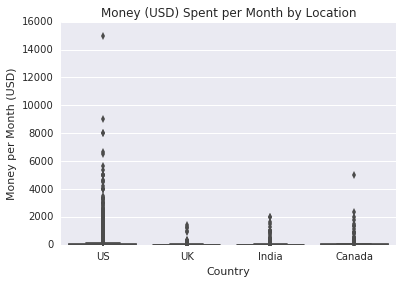

In [26]:
sns.boxplot(x='CountryLive', y='USD_month', data=top_4)
plt.title('Money (USD) Spent per Month by Location')
plt.xlabel('Country')
plt.ylabel('Money per Month (USD)')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

Dealing with these extreme outliers has dropped the mean amount spent per month, as expected. It has also provided a more accurate portrayal of the data at hand.

It continues to seem that the best choice of country to advertise in is the USA. However, the second best country is still undetermined.

## Choosing the Best Two Markets

Aside from the USA, we need to decide what other market to advertise in. Although the UK has a promising number of potential customers, the money those customers spend per month on average is the lowest of the top 4 and likely wouldn't result in a profitable endeavor.

The last choice is between India and Canada and the information at hand isn't enough to determine which would be the better for 2nd choice. Likely some domain knowledge is required to differentiate between the two.

A few questions to consider:

- does it make sense to advertise in more than 2 countries?
- can the advertising budget be split unequally (weighted)?